In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import itertools
%matplotlib inline

## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60&deg; F or warmer than 100&deg; F.

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

##### Find the linear regression equation for this data.

In [3]:
in1 = np.array(df[['Chirps/Second']])
out1 = np.array(df[['Ground Temperature']])
regr1 = linear_model.LinearRegression()
regr1.fit(in1, out1)
print(regr1.coef_, regr1.intercept_)

[[ 3.410323]] [ 22.84898231]


##### Chart the original data and the equation on the chart.

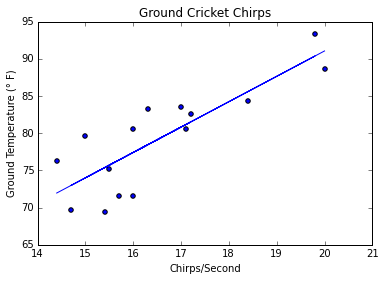

In [4]:
plt.scatter(in1, out1)
plt.plot(in1, regr1.predict(in1))
plt.xlabel('Chirps/Second')
plt.ylabel('Ground Temperature (\u00B0 F)')
plt.title('Ground Cricket Chirps')
plt.show()

##### Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [5]:
regr1.score(in1, out1)

0.69229465291470027

This linear equation is a significant correlation, but not exactly strong

##### Extrapolate data:  If the ground temperature reached 95&deg; F, then at what approximate rate would you expect the crickets to be chirping?


In [6]:
(95 - regr1.intercept_)/regr1.coef_

array([[ 21.15665223]])

##### Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning?

In [7]:
regr1.predict(18)

array([[ 84.2347963]])

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.



In [8]:
df = pd.read_fwf("brain_body.txt")

##### Find the linear regression equation for this data for brain weight to body weight.

In [9]:
in2 = np.array(df[['Brain']])
out2 = np.array(df[['Body']])
regr2 = linear_model.LinearRegression()
regr2.fit(in2, out2)
print(regr2.coef_, regr2.intercept_)

[[ 0.96649637]] [ 91.00439621]


##### Chart the original data and the equation on the chart.

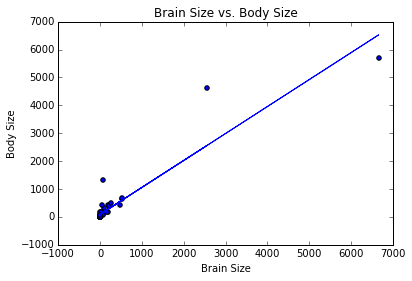

In [10]:
plt.scatter(in2, out2)
plt.plot(in2, regr2.predict(in2))
plt.xlabel('Brain Size')
plt.ylabel('Body Size')
plt.title('Brain Size vs. Body Size')
plt.show()

##### Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [11]:
regr2.score(in2, out2)

0.87266208430433312

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary. Support your argument with graph(s) if appropriate.

In [12]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
men = df[df['Sex'] == 0]
women = df[df['Sex'] == 1]
#df.sort(columns=['Salary'], ascending=False).tail(12)

In [13]:
combos = [list(itertools.combinations(df.columns[0:5], sz)) for sz in range(1, 6)]
combos = list(itertools.chain.from_iterable(combos))
combo_combo = [list(x) for x in combos]
regrs = [linear_model.LinearRegression() \
         .fit(np.array(df[cols]), np.array(df[['Salary']]))
         for cols in combo_combo]
#regrs[0].score(np.array(df[combo_combo[0]]), outp)
score_sort = sorted(list(zip(combo_combo, regrs)), key=lambda x: 
                    x[1].score(np.array(df[x[0]]), 
                               np.array(df[['Salary']])), 
                    reverse=True)

In [14]:
def graph_mw(col):
    inm = np.array(men[[col]])
    inw = np.array(women[[col]])
    outm = np.array(men[['Salary']])
    outw = np.array(women[['Salary']])
    regrmy = linear_model.LinearRegression()
    regrwy = linear_model.LinearRegression()
    regrmy.fit(inm, outm)
    regrwy.fit(inw, outw)
    print("Men's - slope =",regrmy.coef_, "intercept =",
          regrmy.intercept_, 'score =', regrmy.score(inm, outm))
    print("Women's - slope =", regrwy.coef_, "intercept =",
          regrwy.intercept_, 'score =', regrmy.score(inw, outw))
    plt.scatter(inm, outm, c='b')
    plt.scatter(inw, outw, c='g')
    plt.plot(inm, regrmy.predict(inm))
    plt.plot(inw, regrwy.predict(inw))
    plt.xlabel(col)
    plt.ylabel('Salary')
    plt.title(col + ' vs. Salary')
    plt.legend(['Men', 'Women'])
    plt.show()

##### Find the linear regression equation for this data using columns 1-5 to column 6.

In [15]:
for reg in score_sort:
    if len(reg[0]) == 1:
        print('Salary \u2248', reg[1].coef_, '*', reg[0], '+', reg[1].intercept_)

Salary ≈ [[ 5952.77890467]] * ['Rank'] + [ 11663.14300203]
Salary ≈ [[ 752.79775742]] * ['Year'] + [ 18166.14754547]
Salary ≈ [[ 390.64512637]] * ['YSdeg'] + [ 17502.25738659]
Salary ≈ [[-3339.64661654]] * ['Sex'] + [ 24696.78947368]
Salary ≈ [[-858.86928105]] * ['Degree'] + [ 24359.22222222]


##### Find the selection of columns with the best $R^2$ score.

In [16]:
for x in score_sort[:1]:
    print(str(round(x[1].score(np.array(df[x[0]]), np.array(df[['Salary']])), 4)).ljust(6, '0'), x[0])

0.8547 ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']


##### Report whether sex is a factor in salary. Support your argument with graph(s) if appropriate.

Men's - slope = [[ 6010.63655462]] intercept = [ 11726.46848739] score = 0.767269427883
Women's - slope = [[ 5527.10526316]] intercept = [ 11882.10526316] score = 0.656085997201


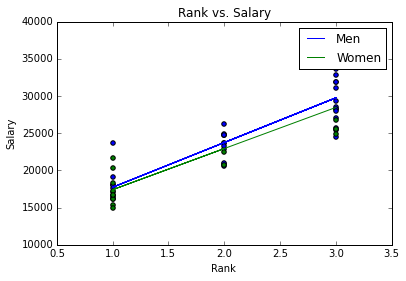

In [17]:
graph_mw('Rank')

Men's - slope = [[ 741.02357232]] intercept = [ 18222.58352606] score = 0.550855421296
Women's - slope = [[ 910.07704004]] intercept = [ 17651.82919412] score = 0.228665689189


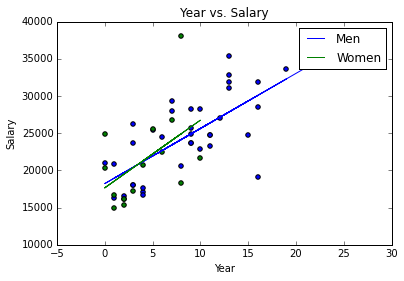

In [18]:
graph_mw('Year')

Men's - slope = [[-347.30952381]] intercept = [ 24916.14285714] score = 0.000904154548697
Women's - slope = [[-1474.]] intercept = [ 22410.] score = -0.306692238922


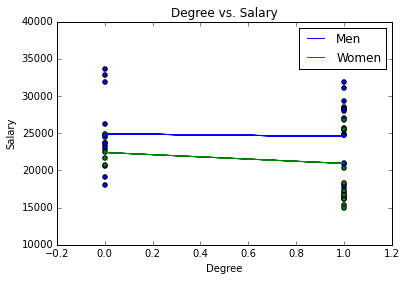

In [19]:
graph_mw('Degree')

Men's - slope = [[ 419.79541266]] intercept = [ 17703.88167857] score = 0.492779236906
Women's - slope = [[ 315.85471651]] intercept = [ 16732.12736544] score = 0.182724499716


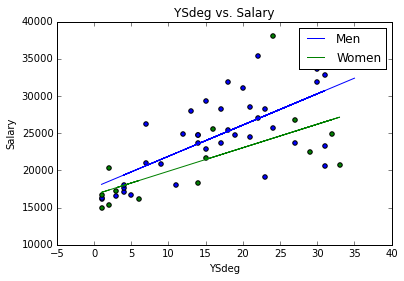

In [20]:
graph_mw('YSdeg')

Based on these graphs, the green lines are lower than the blue lines in each correlation aside from Years, which would indicate that within Rank, Degree, and Years Since Degree, Men have a financial advantage.  By itself, sex seems to even out, as women appear to earn more for each year of employment than men.  That said, even though the top paid professor is a woman, it is interesting to note that 25% of tenured professors make a salary between the top two paid tenured women.